## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [2]:
#
# Your code to import matplotlib, pandas and numpy libraries
#

import tensorflow
!pip freeze > requirements.txt

# import libraries

import pandas as pd
import numpy as np


Following code loads the CIFAR 10 datset.

In [3]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


In [4]:
#
# Your code to print shapes of training and test data. Check how the data looks
#

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
# Your code to print the shape of one image.

# print the shape of one image

x_train[0].shape

(32, 32, 3)

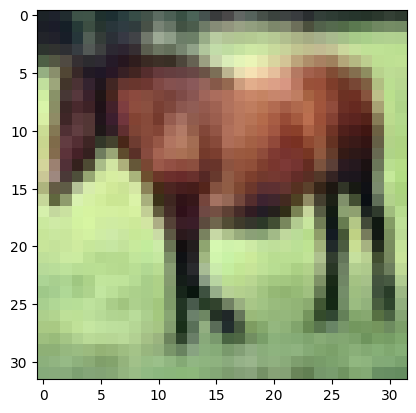

In [6]:
# Your code to show any sample image in the dataset. Use - plt.imshow()



import matplotlib.pyplot as plt


# HORSE
plt.imshow(x_train[7]);

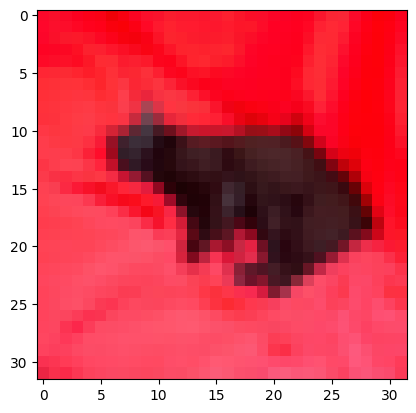

In [7]:
# Show any other image

# Cat
plt.imshow(x_train[21]);

In [ ]:
# Show any other image

In [8]:
# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

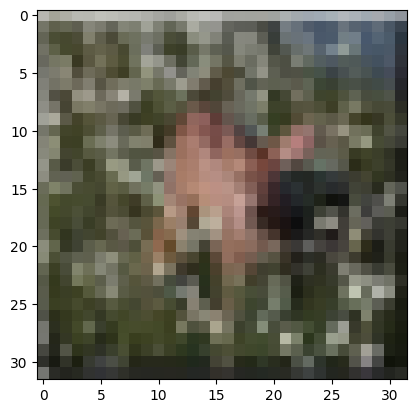

Picture number in the DataBase: 4227
Class number: [4]
Class name: deer


In [9]:
# Random Demo example from database

import random # random number generator

from PIL import Image


n = random.randint(0, x_test.shape[0])

# Image.fromarray - for drawing an image from CIFAR-10
plt.imshow(Image.fromarray(x_train[n]))
plt.show()

print("Picture number in the DataBase:", n)
print("Class number:", y_train[n])
print("Class name:", classes[y_train[n][0]])


# You can run this cell many times, and each timeyou will get a new picture


# PreProcessing

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
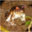

In [10]:
# Your code to print one image in digitals. Check how pixels look like.
x_train[0]

In [12]:
# Your code to print shape of any image i.e particular value in the x_train
x_train[0].shape


(32, 32, 3)

In [17]:
# Your code to print the maximum value in x_train. Hint - Use .max()
x_train.max()


255

In [11]:
x_train = x_train/225
x_test = x_test/255

In [19]:
# Print the shape of x_train again.
x_train.shape


(50000, 32, 32, 3)

In [20]:
# Print the shape of y_train again.
y_train.shape

(50000, 1)

# One hot vector encoding.
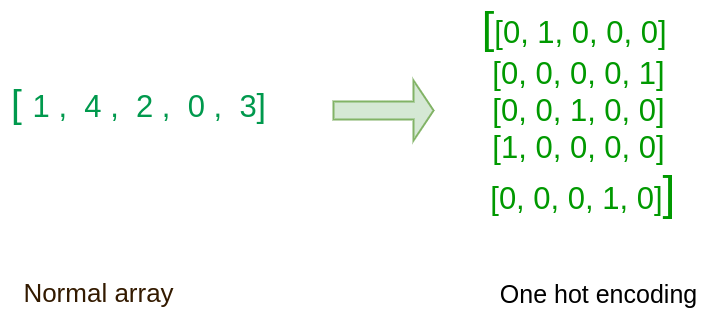


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [12]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
print(y_train.shape)
print(y_train[0].shape)

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train, 10)
print(y_cat_train)

(50000, 1)
(1,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
# Your code to print shape of the array y_cat_train
y_cat_train.shape

(50000, 10)

In [14]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
print(y_train[0], y_cat_train[0])

# Compare the result for better understanding of "to_categorical()"
y_cat_test = to_categorical(y_test, 10)
y_cat_test

[6] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test

# Print the shapes to look how y_cat_test looks.


----------
# Building the Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [16]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

# Add few dense layers.

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))




In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [19]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice

model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)



In [20]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping.
# use 'history' array to save the training parameters for each epoch

history = model.fit(
    x_train,
    y_cat_train,
    epochs=20,
    validation_data=(x_test, y_cat_test),
    shuffle=True,
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/20
1563/1563 [==============================] - 13s 6ms/step - loss: 1.4729 - accuracy: 0.4723 - val_loss: 1.3033 - val_accuracy: 0.5386
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0989 - accuracy: 0.6155 - val_loss: 1.0987 - val_accuracy: 0.6148
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9338 - accuracy: 0.6790 - val_loss: 0.9766 - val_accuracy: 0.6632
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8118 - accuracy: 0.7202 - val_loss: 1.0230 - val_accuracy: 0.6541
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7201 - accuracy: 0.7559 - val_loss: 1.0425 - val_accuracy: 0.6727
Epoch 6/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6458 - accuracy: 0.7809 - val_loss: 0.9706 - val_accuracy: 0.6869
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5841 - accuracy: 0.8030 - val_loss: 1.1395 - val_accuracy

### We can save the model in a file. Following code shows how to do this.

In [21]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this.

In [22]:
losses = pd.DataFrame(model.history.history)

In [23]:
# Print first few rows of losses.
losses.head(10)

,loss,accuracy,val_loss,val_accuracy
0,1.472857,0.47226,1.303292,0.5386
1,1.098853,0.61548,1.098742,0.6148
2,0.933788,0.67902,0.976593,0.6632
3,0.811772,0.72020,1.022963,0.6541
4,0.720077,0.75590,1.042480,0.6727
5,0.645795,0.78088,0.970644,0.6869
6,0.584119,0.80300,1.139511,0.6338
7,0.530640,0.81970,1.524911,0.6418
8,0.481508,0.83974,1.041740,0.6717


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs)
### y axis will have accuracy and val_accuracy





<Axes: >

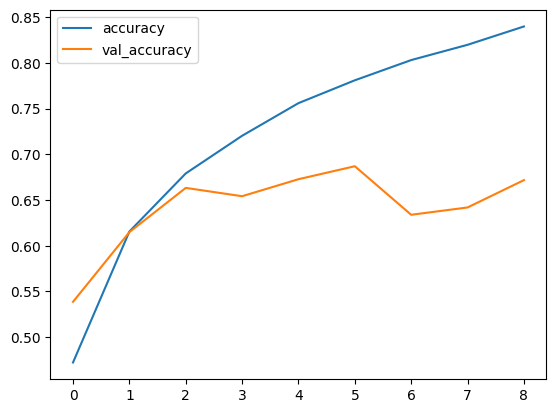

In [24]:
#
# Your code to plot accuracy and val_accuracy vs the epochs
#

losses[
    ['accuracy', 'val_accuracy']
].plot()

<ipython-input-25-2bd65bb545b7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


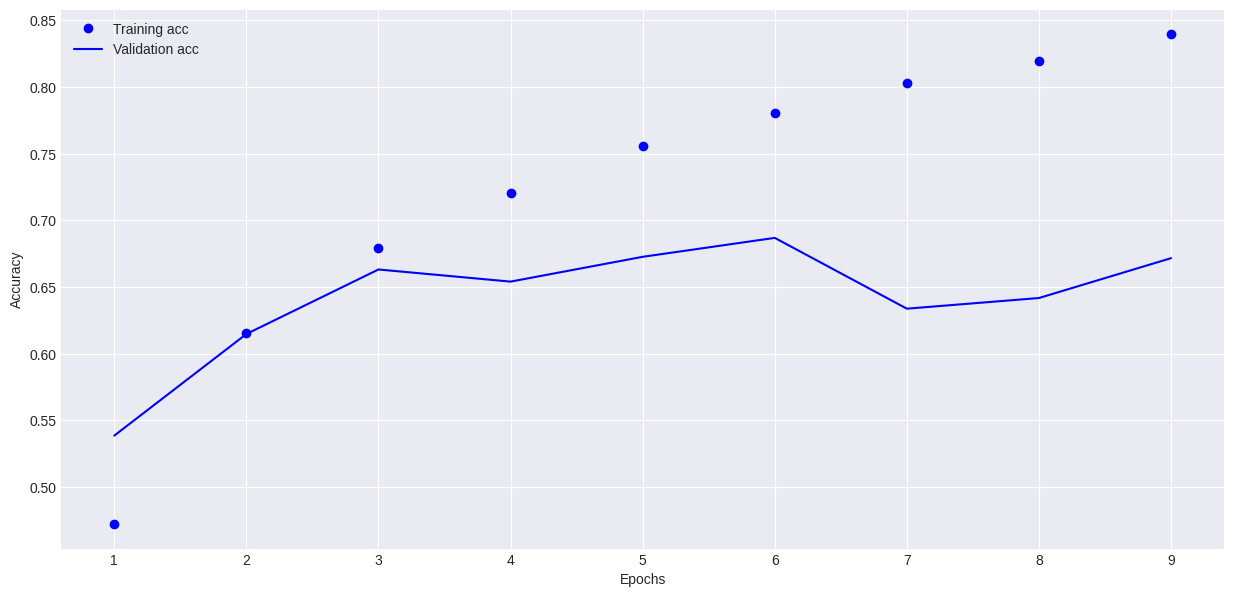

In [25]:
# printing Accuracy for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<Axes: >

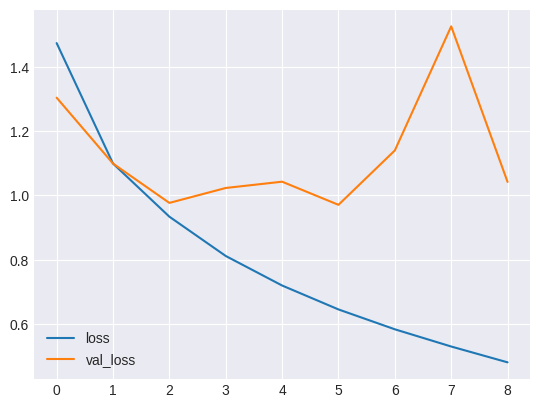

In [26]:
#
# Your code to plot loss and val_loss vs the epochs
#

losses[['loss','val_loss']].plot()



<ipython-input-27-8bd6c1d0dcb3>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


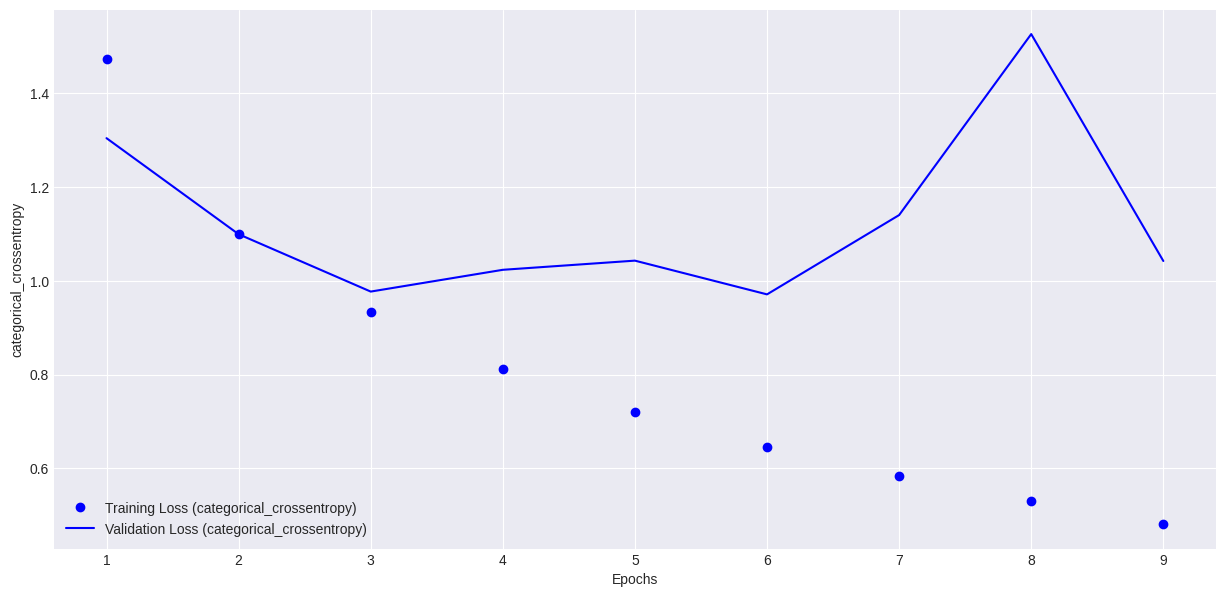

In [27]:
# printing Loss function (categorical_crossentropy) for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training Loss (categorical_crossentropy)')
plt.plot(epochs, val_acc_values, 'b', label='Validation Loss (categorical_crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.legend()

plt.show()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [28]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [29]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0417399406433105, 0.6717000007629395]

### Make a prediction on test data set.   

In [30]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 1s 2ms/step


### We could get the full classification report.

In [31]:
# Your code to import classification_report library from sklearn.metrics

from sklearn.metrics import classification_report

# print(classification_report(y_test, prediction))


In [32]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.62      0.69      1000\n           1       0.77      0.83      0.80      1000\n           2       0.65      0.52      0.58      1000\n           3       0.48      0.50      0.49      1000\n           4       0.56      0.61      0.59      1000\n           5       0.66      0.48      0.56      1000\n           6       0.68      0.83      0.75      1000\n           7       0.61      0.78      0.69      1000\n           8       0.79      0.78      0.78      1000\n           9       0.77      0.76      0.77      1000\n\n    accuracy                           0.67     10000\n   macro avg       0.68      0.67      0.67     10000\nweighted avg       0.68      0.67      0.67     10000\n'

### We could also get and plot confusion matrix.

https://github.com/matplotlib/matplotlib/issues/14751

In [33]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

# confusion_matrix(y_test,prediction)


In [34]:
confusion_matrix(y_test,predictions)

array([[616,  38,  57,  34,  58,   6,  17,  34, 100,  40],
       [ 20, 831,   6,   7,   3,   3,  23,  12,  29,  66],
       [ 35,  10, 524,  87, 110,  57,  74,  84,  10,   9],
       [ 11,  21,  43, 498, 109, 110, 101,  65,  12,  30],
       [ 11,   9,  47,  69, 613,  25,  83, 126,  11,   6],
       [ 10,   7,  57, 194,  71, 481,  49, 112,   9,  10],
       [  4,   5,  25,  52,  41,  12, 832,  14,   7,   8],
       [  7,   6,  26,  51,  57,  33,  17, 779,   4,  20],
       [ 53,  42,  15,  27,  17,   3,  11,  12, 781,  39],
       [ 17, 106,   7,  27,   7,   3,  14,  29,  28, 762]])

<Axes: >

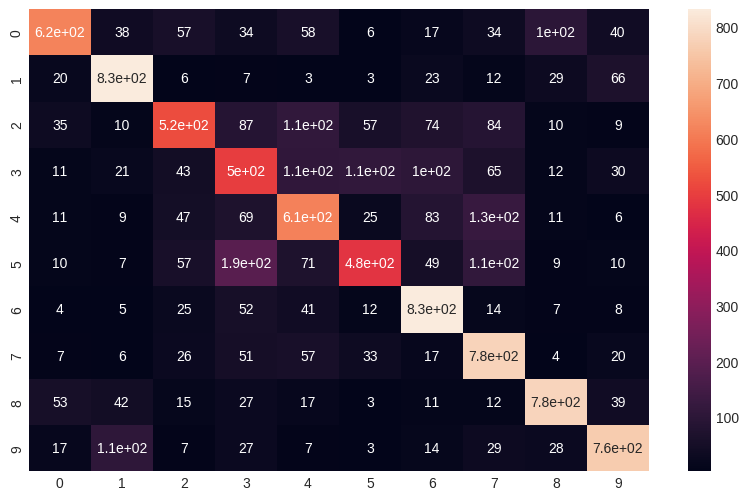

In [35]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [36]:
my_image = x_test[16]

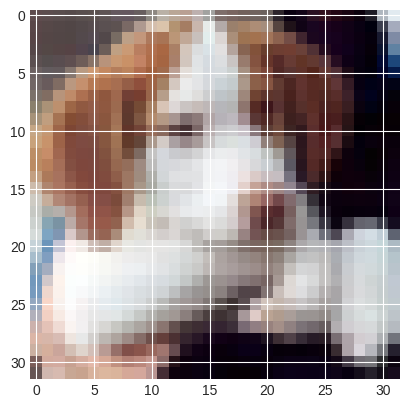

In [37]:
plt.imshow(my_image)

In [38]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 172ms/step


array([[2.3858724e-06, 1.1509550e-05, 1.0676848e-04, 1.2638654e-01,
        3.7667094e-05, 6.9148248e-01, 5.8384467e-05, 1.8133616e-01,
        5.1563041e-04, 6.2412473e-05]], dtype=float32)

1/1 [==============================] - 0s 18ms/step


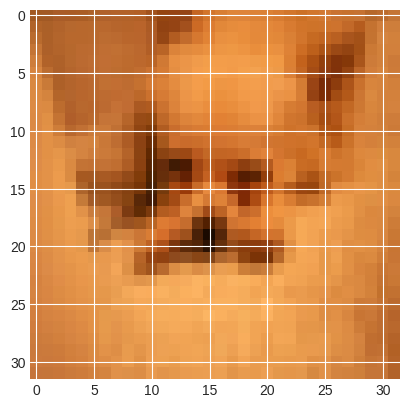

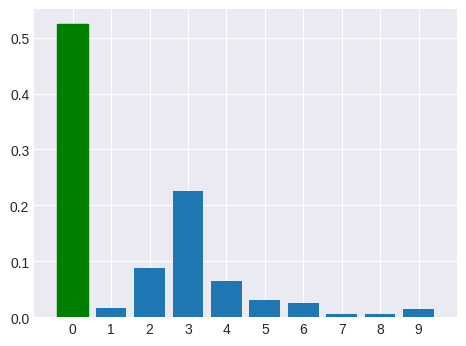

The predicted answer: aircraft 
 Correct answer: dog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [43]:
# Find the highest probability value in the vector above.
# What output value does it point to?

# image recognition demonstration
# neural network operation

from tensorflow.keras.preprocessing.image import array_to_img

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

In [40]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 19ms/step


array([5])

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 [==============================] - 0s 17ms/step


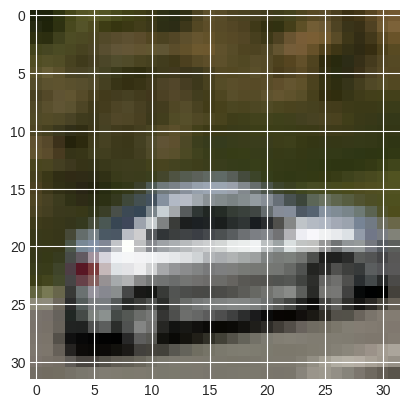

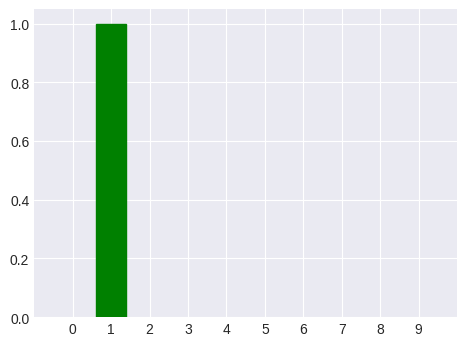

The predicted answer: car 
 Correct answer: car
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [44]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras.

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [ ]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser

In [45]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adadelta']
scores = []

In [46]:
for row in optimizers:
  model.compile(loss='categorical_crossentropy', optimizer= row, metrics=['accuracy'])
  model.fit(x_train,y_cat_train,epochs=3,validation_data=(x_test,y_cat_test),callbacks=[early_stop])
  scores.append(model.evaluate(x_test,y_cat_test,verbose=0))

Epoch 1/3
1563/1563 [==============================] - 12s 5ms/step - loss: 0.3863 - accuracy: 0.8716 - val_loss: 1.5317 - val_accuracy: 0.6758
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2598 - accuracy: 0.9138 - val_loss: 1.2955 - val_accuracy: 0.6844
Epoch 3/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2298 - accuracy: 0.9219 - val_loss: 1.3430 - val_accuracy: 0.7076
Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4163 - accuracy: 0.8656 - val_loss: 1.4528 - val_accuracy: 0.6790
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3921 - accuracy: 0.8724 - val_loss: 1.5664 - val_accuracy: 0.6802
Epoch 3/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3704 - accuracy: 0.8813 - val_loss: 1.3944 - val_accuracy: 0.6819
Epoch 1/3
1563/1563 [==============================] - 10s 5ms/step - loss: 0.3244 - accuracy: 0.8934 - val_loss: 1.5107 - val_accuracy: 0.6

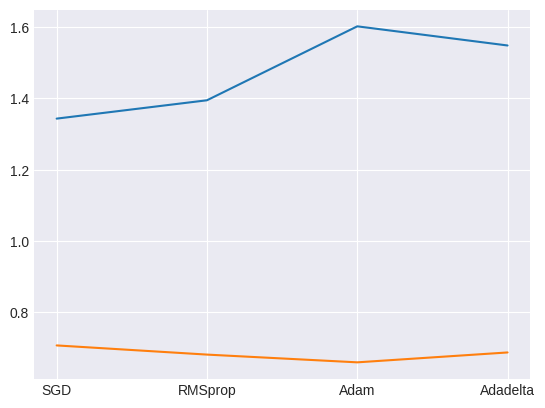

In [47]:
plt.plot (optimizers, scores);

# Lab logbook requirement:
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends.
# Based on this analysis, determine the optimal number of epochs for training your model.

In [48]:
print(scores)

[[1.3429962396621704, 0.7075999975204468], [1.3943840265274048, 0.6819000244140625], [1.6015316247940063, 0.6601999998092651], [1.547898292541504, 0.6879000067710876]]
